In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D, Flatten

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Bitcoin/BTC-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
1092,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
1093,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
1094,2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
1095,2022-11-29,16217.639648,16522.257813,16139.396484,16444.982422,16444.982422,23581685468


# **Data Pre-processing**

In [4]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [5]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

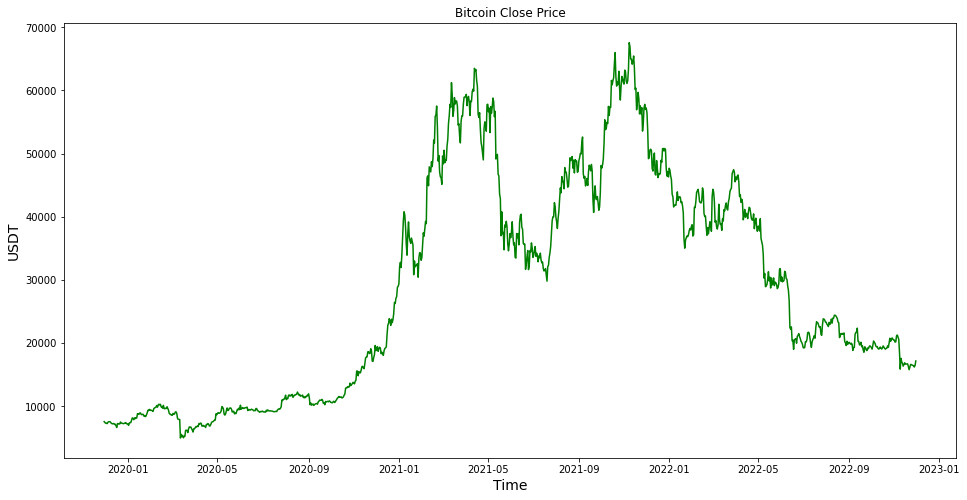

In [6]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="green")
plt.title('Bitcoin Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [7]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040706
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918
...,...,...,...,...,...,...,...
846,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,30574413034
847,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995
848,2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
849,2022-03-28,46821.851563,48086.835938,46690.203125,47128.003906,47128.003906,36362175703


In [8]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
853,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
854,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
855,2022-04-03,45859.128906,47313.476563,45634.105469,46453.566406,46453.566406,25414397610
856,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
...,...,...,...,...,...,...,...
1092,2022-11-26,16521.576172,16666.863281,16416.228516,16464.281250,16464.281250,18000008764
1093,2022-11-27,16463.882813,16594.406250,16437.025391,16444.626953,16444.626953,20443898509
1094,2022-11-28,16440.222656,16482.933594,16054.530273,16217.322266,16217.322266,27743025156
1095,2022-11-29,16217.639648,16522.257813,16139.396484,16444.982422,16444.982422,23581685468


# **Feature Engineering**

In [9]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,7764.057129,7836.102051,7515.849609,7569.629883,17158194786
1,7571.616211,7571.616211,7291.341797,7424.292480,18720708479
2,7424.036133,7474.818848,7233.399414,7321.988281,17082040706
3,7323.975586,7418.858887,7229.356934,7320.145508,14797485769
4,7320.125000,7539.784668,7170.922852,7252.034668,21664240918


In [10]:
#Normalizing training_data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.04415035, 0.03946352, 0.05473889, 0.04151767, 0.01448294],
       [0.04107362, 0.03529562, 0.05113379, 0.03919584, 0.019096  ],
       [0.03871412, 0.03377024, 0.05020336, 0.03756148, 0.01425811],
       ...,
       [0.63156792, 0.65391045, 0.64761556, 0.66856792, 0.04696654],
       [0.66860391, 0.67375497, 0.68379231, 0.67348056, 0.07117946],
       [0.67305793, 0.67273781, 0.69037977, 0.67887589, 0.05652079]])

In [11]:
#Prepare train data
X_train = []
Y_train = []

In [12]:
training_data.shape[0]

851

In [13]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [14]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(791, 60, 5)

# Model Building

In [17]:
model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 5)))
model.add(GRU(10, activation='relu', input_shape=(X_train.shape[1],5)))
#model.add(GRU(20, activation='relu', return_sequences=True, input_shape=(length,1)))
#model.add(GRU(10, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10)                510       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 50, batch_size =32)

Epoch 1/50
25/25 [==============================] - 2s 20ms/step - loss: 0.4101
Epoch 2/50
25/25 [==============================] - 0s 20ms/step - loss: 0.2658
Epoch 3/50
25/25 [==============================] - 1s 20ms/step - loss: 0.1756
Epoch 4/50
25/25 [==============================] - 1s 20ms/step - loss: 0.1216
Epoch 5/50
25/25 [==============================] - 1s 20ms/step - loss: 0.0845
Epoch 6/50
25/25 [==============================] - 1s 22ms/step - loss: 0.0519
Epoch 7/50
25/25 [==============================] - 1s 20ms/step - loss: 0.0264
Epoch 8/50
25/25 [==============================] - 1s 21ms/step - loss: 0.0114
Epoch 9/50
25/25 [==============================] - 0s 20ms/step - loss: 0.0046
Epoch 10/50
25/25 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 11/50
25/25 [==============================] - 0s 19ms/step - loss: 0.0011
Epoch 12/50
25/25 [==============================] - 1s 22ms/step - loss: 7.1247e-04
Epoch 13/50
25/25 [==============

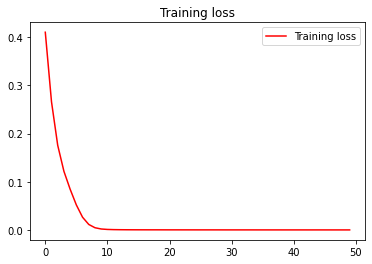

<Figure size 432x288 with 0 Axes>

In [19]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# **Performance Evaluation**

In [20]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,37780.714844,38576.261719,37406.472656,38138.179688,17194183075
1,38151.917969,38266.339844,37437.710938,37917.601563,14643548444
2,37920.281250,38647.261719,36733.574219,38483.125000,20734730465
3,38481.765625,39115.132813,38113.664063,38743.273438,20288500328
4,38743.714844,38834.617188,36832.730469,36952.984375,19155189416


In [21]:
inputs = scaler.transform(df)
inputs

array([[0.52405479, 0.52388252, 0.53471615, 0.52986405, 0.01458919],
       [0.52998956, 0.51899862, 0.53521777, 0.52634022, 0.00705887],
       [0.52628617, 0.52500138, 0.52391089, 0.53537471, 0.02504206],
       ...,
       [0.18286434, 0.17572467, 0.1918512 , 0.17966846, 0.04573287],
       [0.1793057 , 0.17634436, 0.19321397, 0.18330543, 0.03344721],
       [0.18294834, 0.18688176, 0.19812894, 0.19486502, 0.05098965]])

In [22]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [23]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((245, 60, 5), (245,))

In [24]:
Y_pred = model.predict(X_test)

8/8 [==============================] - 0s 5ms/step


In [25]:
print("RMSE: ", math.sqrt(mean_squared_error(Y_test,Y_pred)))
print("MSE: ", mean_squared_error(Y_test,Y_pred))
print("MAE: ", mean_absolute_error(Y_test,Y_pred))
print("R2 score:", r2_score(Y_test, Y_pred))

RMSE:  0.007121214618488178
MSE:  5.071169764256973e-05
MAE:  0.004987855094139135
R2 score: 0.9969031594644767


In [26]:
scaler.scale_

array([1.59879371e-05, 1.57585063e-05, 1.60577871e-05, 1.59754515e-05,
       2.95233159e-12])

In [27]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [28]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [29]:
# Y_test = scaler.inverse_transform(Y_test)
# Y_pred = scaler.inverse_transform(Y_pred) 

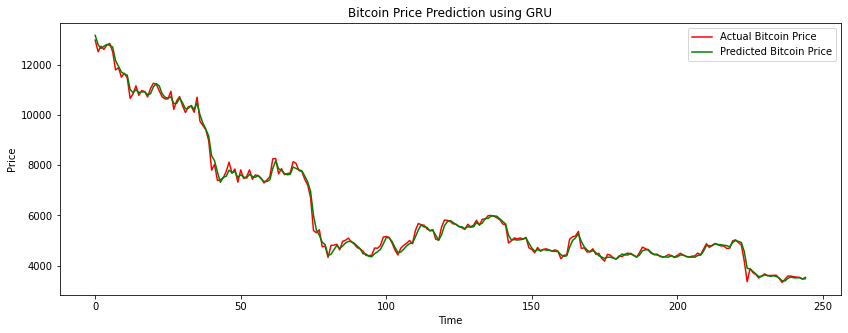

In [31]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()